# Agenda today:
1. Overview of NLP
2. Model Building Remains Consistent
2. Pre-Processing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
3. Feature Engineering for NLP
    - Bag-of-Words
    - Count Vectorizer
    - Term frequency-Inverse Document Frequency (tf-idf)


In [1]:
# This is always a good idea
%load_ext autoreload
%autoreload 2

# This is always a good idea
%load_ext autoreload
%autoreload 2

from src.student_caller import one_random_student
from src.student_list import student_first_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Overview of NLP
NLP allows computers to interact with text data in a structured and sensible way. In short, we will be breaking up series of texts into individual words (or groups of words), and isolating the words with **semantic value**.  We will then compare texts with similar distributions of these words, and group them together.

In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Speech recognition and audio processing 
- Classifying documents 

Here is an example that uses some of the tools we use in this notebook.  
  -[chi_justice_project](https://chicagojustice.org/research/justice-media-project/)  
  -[chicago_justice classifier](https://github.com/chicago-justice-project/article-tagging/blob/master/lib/notebooks/bag-of-words-count-stemmed-binary.ipynb)

We will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

We will also introduce you to [**NLTK**](https://www.nltk.org/) (Natural Language Toolkit), which will be our main tool for engaging with textual data.

# NLP process 
<img src="img/nlp_process.png" style="width:1000px;">

# 2. Model Building Principles Remain Consistent

In [33]:
#!pip install nltk
# conda install -c anaconda nltk

We will be working with a dataset which includes both **satirical** (The Onion) and real news (Reuters) articles. 

### Vocab
> We refer to the entire set of articles as the **corpus**.  

In [34]:
# Let's import our corpus. 
import pandas as pd


Our goal is to detect satire, so our target class of 1 is associated with The Onion articles. 

![the_onion](img/the_onion.jpeg) ![reuters](img/reuters.png)

This is a highly relavent task.  If we could separate real news from fictitious news, we would be able to potentially flag the latter as such.  This does come with risks.  If we deploy a model which mislabel real news as ficticious news, we will open ourselves to all sorts of criticism.  A false positive in this sense to bury a story or do damage to a reporter's reputation. 

#### More Vocab
> Each article in the corpus is refered to as a **document**.

In [36]:
# How many documents are there in the corpus?

In [38]:
# What is the class balance?

In [40]:
# Let's look at some example texts from both categories

# Category 1


In [41]:
# Category 0

Let's think about our types of error and the use cases of being able to correctly separate satirical from authentic news. What type of error should we decide to optimize our models for?  

In [43]:
# Help me fill in the blanks:

# Pass in the body of the documents as raw text
X = None
y = None

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [46]:
# For demonstration purposes, we will perform a secondary train test split. In practice, we will apply a pipeline.

X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# A new preprocessing tool!
tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")

# Like always, we are fitting only on the training set
X_t_vec = None

# Here is our new dataframe of predictors
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())

X_t_vec.head()

AttributeError: 'NoneType' object has no attribute 'toarray'

In [49]:
# That's a lot of columns
X_t_vec.shape

(640, 18970)

### We can push this data into any of our classification models


In [50]:
# Code here

# We proceed as usual:
    - Transform the validation set
    - Score the validation set
    - Plot a confusion matrix to check out the performance on different types of errors
 

In [52]:
# your code here

# Transform X_val
X_val_vec = None

# Score val
y_hat = None

# Plot confusion matrix


#### How did your model do?  

Probably well.  
It's pretty amazing the patterns, even a relatively low power one such as logistic regression, can find in text data.

# 3 Preprocessing

### Tokenization 

In order to convert the texts into data suitable for machine learning, we need to break down the documents into smaller parts. 

The first step in doing that is **tokenization**.

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

Let's consider the first document in our corpus:

In [59]:
first_document = None

There are many ways to tokenize our document. 

It is a long string, so the first way we might consider is to split it by spaces.

In [61]:
# code

In [63]:
one_random_student(student_first_names)

Josh


#### Chat out some problems (don't look down)

<img src="https://media.giphy.com/media/ZaiC2DYDRiqhQ269nz/giphy.gif" style="width:1500px;">

We are trying to create a set of tokens with **high semantic value**.  In other words, we want to isolate text which best represents the meaning in each document.  


## Common text cleaning tasks:  
  1. remove capitalization  
  2. remove punctuation  
  3. remove stopwords  
  4. remove numbers

We could manually perform all of these tasks with string operations

## Capitalization

When we create our matrix of words associated with our corpus, **capital letters** will mess things up.  The semantic value of a word used at the beginning of a sentence is the same as that same word in the middle of the sentence.  In the two sentences:

sentence_one =  "Excessive gerrymandering in small counties suppresses turnout."   
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."  

Excessive has the same semantic value, but will be treated as two separate tokens because of capitals.

In [64]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."


In [65]:
# Code for Excessive does not equal excessive


### Let's fill in the list comprehension below to manually and remove capitals from the 1st document

In [67]:
manual_cleanup = None

In [69]:
print(f"Our initial token set for our first document is {len(manual_cleanup)} words long")

Our initial token set for our first document is 154 words long


In [70]:
print(f"Our initial token set for our first document has {len(set(first_document.split()))} unique words")

Our initial token set for our first document has 117 unique words


In [71]:
print(f"After remove caps, our first document has {len(set(manual_cleanup))} unique words")

After remove caps, our first document has 115 unique words


By removing capitals, we decrease the total unique word count in our first document by 2.  That may not seem like much, but across an entire corpus, it will make a big difference.

## Punctuation

Like capitals, splitting on white space will create tokens which include punctuation that will muck up our semantics.  

Returning to the above example, 'gerrymandering' and 'gerrymandering.' will be treated as different tokens.

In [75]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."

In [76]:
# Code to show our computer differentiates between the same word with different punctuations

# Different ways to strip punctuation

In [81]:
# Strip with translate

## Manual removal of punctuation
# string library!
import string

string.punctuation
punctuation = string.punctuation + '“'
punctuation
# string.ascii_letters



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“'

# Strip with regex

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

Other helpful resources:

https://regexcrossword.com/  
https://www.regular-expressions.info/tutorial.html

In [83]:
import re
# Test out a word and search it

# Create a pattern that matches only letters to strip punctuation
pattern = None

# Use re.search to search for a word.
target_word = manual_cleanup[10]

# Use the .group() method to return the matched word



In [85]:
# Use a list comprehension to search each word in the word list and return the match.
# Use an if statement to make sure the .group() method does not throw an error.

# Code here

In [88]:
print(f"After removing punctuation, our first document has {len(set(manual_cleanup))} unique words")

After removing punctuation, our first document has 107 unique words


### Stopwords

Stopwords are the **filler** words in a language: prepositions, articles, conjunctions. They have low semantic value, and almost always need to be removed.  

Luckily, NLTK has lists of stopwords ready for our use.

In [89]:
stopwords.words('english')[:10]

# Try other langauges below

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

As you notice above, stopwords come from the [nltk corpus package](http://www.nltk.org/book_1ed/ch02.html#tab-corpora).  The corpus package contains a variety of texts that are free to download and use.

Let's see which stopwords are present in our first document.

In [90]:
stops = [token for token in manual_cleanup if token in stopwords.words('english')]


In [91]:
stops = [token for token in manual_cleanup if token in stopwords.words('english')]
stops[:10]

['that', 'the', 'of', 'as', 'of', 'the', 'of', 'the', 'in', 'than']

In [92]:
print(f'There are {len(stops)} stopwords in the first document')

There are 68 stopwords in the first document


In [93]:
print(f'That is {len(stops)/len(manual_cleanup): .2%} of our text')

That is  44.44% of our text


Let's also use the **FreqDist** tool to look at the makeup of our text before and after removal

In [94]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [96]:
manual_cleanup = [token for token in manual_cleanup if token not in stopwords.words('english')]

In [ ]:
# We can also customize our stopwords list

In [98]:
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]


In [99]:
print(f'After removing stopwords, there are {len(set(manual_cleanup))} unique words left')

After removing stopwords, there are 74 unique words left


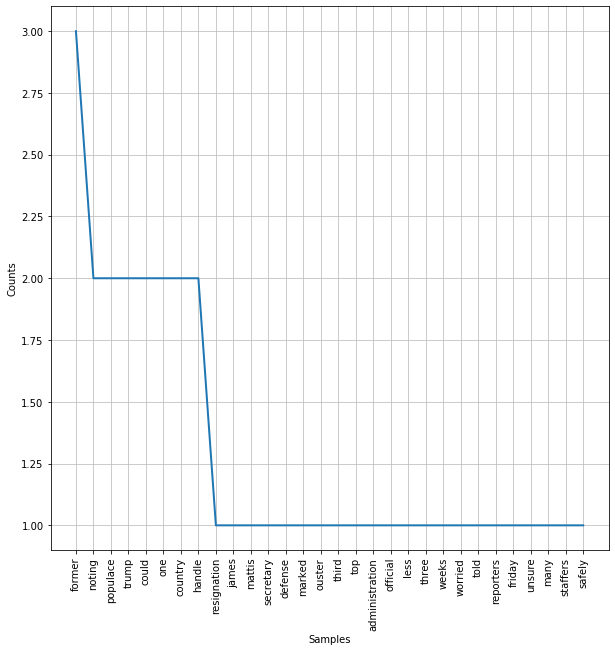

In [377]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [100]:
# From the Frequency Dist plot, there are perhaps some more stopwords we can remove


#### Numbers

Numbers also usually have low semantic value. Their removal can help improve our models. 

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Bringing back our regex symbols, we can quickly figure out patterns which will filter out numeric values.

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

In [144]:
# pattern to remove numbers (probably same as above)

no_num_pattern = None

test_string = "Reno 911"

re.search(no_num_pattern, test_string).group()


TypeError: first argument must be string or compiled pattern

# Pair Exercise:  
Sklearn and NLTK provide us with a suite of **tokenizers** for our text preprocessing convenience.


In [160]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer


We can use them to condense the steps above.  As we will see, even more steps will be condensed in the vectorizors introduced at the end of the notebook.  

For now, we will still need to make our list lowercase and remove stopwords by hand. 

It is important to get used to the process of tokenizing by hand, since it will give us more freedom in certain preprocessing steps (see stemmers/lemmers below).

For this exercise, take the sample_doc below and use the tokenizer of your choice to create word tokens.  If you use the regexp vectorizor, I have included a regex pattern that does not exclude contractions.  Feel free to pass that in as an argument.

After tokenizing, make tokens lowercase, and remove stopwords.

In [192]:
sample_doc = X_t.sample(random_state=42).values[0]
sample_doc

'“Yes, we can confirm that Mrs. May is actively looking for other employment opportunities. She has a copy of the Evening Standard where they post some job ads. In fact, there is one job she is applying to, and that is a shoe saleswoman in Barking, East London. This would be a great opportunity for the ex-PM to be around what she loves, shoes.” The final nail in the coffin for many was Theresa May approving that the European Courts of Justice would have full jurisdiction in Britain after Brexit. This is tantamount to Britain not leaving the EU at all. The soon-to-be ex-PM also conceded to pay Brussels whatever they want with a 100 billion euro payment, of course taken out of the purse of the British taxpayer. This blackmail ransom money could have easily been avoided by not pandering to the EU’s ridiculous demands and simply leaving the talks. Instead, Theresa May lifted up her skirt, bent over the table and was used like a piece of sallow rotting meat by EU eurocrats. In a failed Brex

In [193]:
import re
re.findall(r"([a-zA-Z]+(?:'[a-z]+)?)" , "I'd")

["I'd"]

In [195]:
# your code here

# Use the tokenizer of your choice using the .tokenize() method.
tokenizer = None

# make lowercase

# remove stopwords



In [197]:
print(f'We are down to {len(set(sample_doc))} unique words')

We are down to 141 unique words


# Stemming

Most of the semantic meaning of a word is held in the root, which is usually the beginning of a word.  Conjugations and plurality do not change the semantic meaning. "eat", "eats", and "eating" all have essentially the same meaning packed into eat.   

Stemmers consolidate similar words by chopping off the ends of the words.

![stemmer](img/stemmer.png)

There are different stemmers available.  The two we will use here are the **Porter** and **Snowball** stemmers.  A main difference between the two is how agressively it stems, Porter being less agressive.

In [199]:
from nltk.stem import *

# instantiate a PorterStemmer and a SnowballStemmer.  Pass language='english' as an argument to the Snowball

In [207]:
# using the .stem() method, try out stemming some words from the sample doc


'confirm'

In [213]:
difference_count = 0
for word in sample_doc:
    p_word = p_stemmer.stem(word)
    s_word = s_stemmer.stem(word)
    
    if p_word != s_word:
        print(p_word, s_word)
        difference_count += 1
        
print("\n" f"Of the {len(sample_doc)} words in the sample doc, only {difference_count} are stemmed differently")
    

ye yes
mr mrs
eu’ eu
ye yes
gener general
people’ peopl

Of the 171 words in the sample doc, only 6 are stemmed differently


In [216]:
# Let's use the snowball stemmer, and stem all the words in the doc


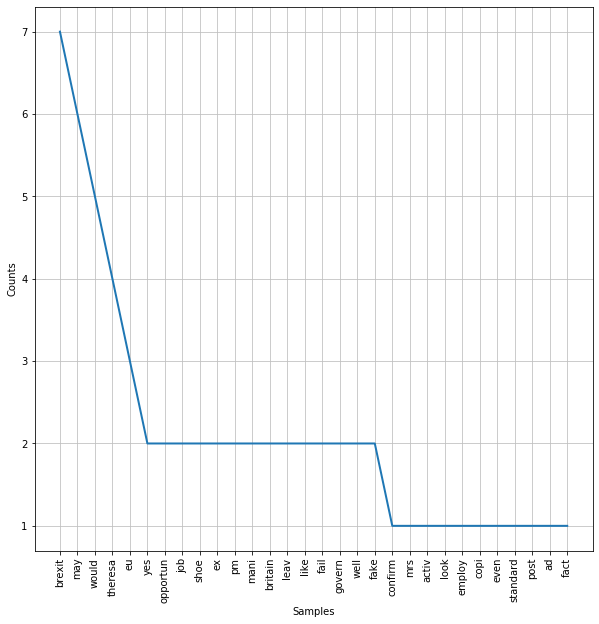

In [220]:
fdist = FreqDist(sample_doc)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [223]:
print(f'Stemming reduced our token count {len(set(sample_doc))} to unique tokens')

Stemming reduced our token count 137 to unique tokens


# Lemming

Lemming is a bit more sophisticated that the stem choppers.  Lemming uses part of speech tagging to determine how to transform a word.  In that 
Lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.  It can handle words such as "mouse", whose plural "mice" the stemmers would not lump together with the original. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

![lemmer](img/lemmer.png)


In [225]:
from nltk.stem import WordNetLemmatizer 
  
# instantiate a lemmatizer
lemmatizer = None

In [231]:
# think of a noun with an irregular plural form and pass the string as an argument to the lemmatizer
print(f'<Irregular noun> becomes: {lemmatizer.lemmatize()}')


TypeError: lemmatize() missing 1 required positional argument: 'word'

In [264]:
new_sample = X_t.sample().values[0]
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")

new_sample = tokenizer.tokenize(new_sample)
new_sample

['Britain',
 'is',
 'recalling',
 'two',
 'patrol',
 'boats',
 'from',
 'overseas',
 'deployments',
 'to',
 'help',
 'deal',
 'with',
 'an',
 'increase',
 'in',
 'the',
 'number',
 'of',
 'migrants',
 'trying',
 'to',
 'reach',
 'the',
 'country',
 'from',
 'France',
 'interior',
 'minister',
 'Sajid',
 'Javid',
 'said',
 'on',
 'Monday',
 'Javid',
 'said',
 'there',
 'had',
 'been',
 'an',
 'increase',
 'in',
 'the',
 'number',
 'of',
 'migrants',
 'crossing',
 'the',
 'English',
 'Channel',
 'from',
 'France',
 'and',
 'last',
 'week',
 'he',
 'declared',
 'the',
 'situation',
 'a',
 'major',
 'incident',
 'On',
 'Monday',
 'following',
 'a',
 'meeting',
 'of',
 'officials',
 'in',
 'London',
 'he',
 'said',
 'two',
 'the',
 'additional',
 'ships',
 'would',
 'join',
 'three',
 'other',
 'vessels',
 'already',
 'working',
 'in',
 'the',
 'channel',
 'He',
 'said',
 'migrants',
 'had',
 'attempted',
 'to',
 'cross',
 'one',
 'of',
 'the',
 'world’s',
 'busiest',
 'shipping',
 'lanes',

In [269]:
print(f'{new_sample[8]} becomes: {lemmatizer.lemmatize(new_sample[8])}')

deployments becomes: deployment


In [270]:
# However, look at the output below:
    
sentence = "He saw the trees get sawed down"
lemmed_sentence = [lemmatizer.lemmatize(token) for token in sentence.split(' ')]
lemmed_sentence

['He', 'saw', 'the', 'tree', 'get', 'sawed', 'down']

In [271]:
one_random_student(student_first_names)
# What should have changed form but didn't?

Jeffrey


Lemmatizers depend on POS tagging, and defaults to noun.

With a little bit of work, we can POS tag our text.

In [298]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
new_sample = [token for token in new_sample if token not in custom_sw]
new_sample

['Britain',
 'recalling',
 'two',
 'patrol',
 'boats',
 'overseas',
 'deployments',
 'help',
 'deal',
 'increase',
 'number',
 'migrants',
 'trying',
 'reach',
 'country',
 'France',
 'interior',
 'minister',
 'Sajid',
 'Javid',
 'said',
 'Monday',
 'Javid',
 'said',
 'increase',
 'number',
 'migrants',
 'crossing',
 'English',
 'Channel',
 'France',
 'last',
 'week',
 'declared',
 'situation',
 'major',
 'incident',
 'On',
 'Monday',
 'following',
 'meeting',
 'officials',
 'London',
 'said',
 'two',
 'additional',
 'ships',
 'would',
 'join',
 'three',
 'vessels',
 'already',
 'working',
 'channel',
 'He',
 'said',
 'migrants',
 'attempted',
 'cross',
 'world’s',
 'busiest',
 'shipping',
 'lanes',
 'December',
 'although',
 'almost',
 'half',
 'prevented',
 'leaving',
 'France',
 'The',
 'number',
 'tiny',
 'fraction',
 'regularly',
 'attempting',
 'reach',
 'European',
 'Union',
 'territory',
 'crossing',
 'Mediterranean',
 'northern',
 'Africa',
 'Turkey',
 'many',
 'fleeing',
 'co

In [299]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/johnmaxbarry/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [300]:
from nltk import pos_tag
# Use nltk's pos_tag to tag our words
# Does a pretty good job, but does make some mistakes


In [302]:
# Then transform the tags into the tags of our lemmatizers
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [303]:
new_sample_tagged = [(token[0], get_wordnet_pos(token[1]))
             for token in new_sample_tagged]

In [304]:
# Now lemmatize with the POS fed into the lemmatizer


In [307]:
new_sample_lemmed[:10]

['Britain',
 'recall',
 'two',
 'patrol',
 'boat',
 'overseas',
 'deployment',
 'help',
 'deal',
 'increase']

In [309]:
print(f'There are {len(set(new_sample_lemmed))} unique lemmas')

There are 162 unique lemmas


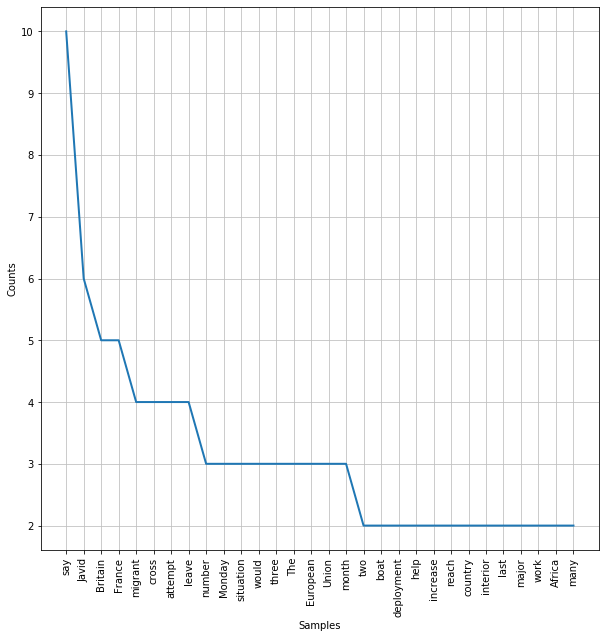

In [311]:
fdist = FreqDist(new_sample_lemmed)
plt.figure(figsize=(10,10))
fdist.plot(30)

## 4. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called **Bag-of-words (BoW)**. 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:

![document term matrix](img/document_term_matrix.png)

In [313]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

# instantiate a count vectorizer
vec = None

# fit vectorizor on our lemmed sample. Note, the vectorizer takes in raw texts, so we need to join all of our lemmed tokens.
X = 

,account,add,additional,africa,almost,already,also,although,amid,around,...,union,vessel,vote,want,week,well,work,world,would,year
0,1,1,1,2,1,1,1,1,1,1,...,3,1,1,1,1,1,2,1,3,1


That is not very exciting for one document. The idea is to make a document term matrix for all of the words in our corpus.

In [314]:
corpus

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1
...,...,...
995,Britain’s opposition leader Jeremy Corbyn wou...,0
996,Turkey will take over the fight against Islam...,0
997,Malaysia is seeking $7.5 billion in reparatio...,0
998,An Israeli court sentenced a Palestinian to 1...,0


We can pass in arguments such as a regex pattern, a list of stopwords, and an ngram range to do our preprocessing in one fell swoop.   
*Note lowercase defaults to true.*

In [316]:
# pass in the regex from above, our cusomt stopwords, and an ngram range: [1,1], [1,2] , [1,3]

Our document term matrix gets bigger and bigger, with more and more zeros, becoming sparser and sparser.

> In case you forgot, a sparse matrix "is a matrix in which most of the elements are zero." [wikipedia](https://en.wikipedia.org/wiki/Sparse_matrix)

We can set upper and lower limits to the word frequency.

In [322]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2], min_df=2, max_df=25)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

,aapl,aaron,aaron ross,ab,abandon,abandon conservatives,abandoned,abandoned grassroots,abandoning,abandoning quarter,...,zone,zone eu,zones,zoo,zoo closed,zooming,zor,zte,zte corp,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

- TF (Term Frequency)
term frequency is the frequency of the word in the document divided by the total words in the document.

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number\ of\ documents}{num\ of\ documents\ containing\ w})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer


,aa,aaaaaaah,aaaaaah,aaaaargh,aaaah,aaah,aaargh,aah,aahing,aap,...,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss,zzzzzst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
corpus.iloc[313].body

'Power nerds, these are a special breed of techie nerds who want to take over the world with their technological prowess. From the birth of the World Wide Web, these power nerds have created and grown companies that are now monopolies controlling every facet of people’s lives. Smartphones, apps, search engines, social networks – power nerds are in everything, their power increases daily as more millions of people use their networks. Power nerds are ruthless, they are creatures who do not balk in crushing their opponents completely without mercy and their greed for complete controlling power over everything is boundless. To quote a few examples of companies that are run by ruthless power nerds, we can of course cite Facebook, Twitter, Amazon and Google. These companies are not only seeking to rule and control everything, they also are using their power to manipulate data taken from their platforms to make money and increase their influence, as well as shut down any voices that are not l

In [327]:
df.iloc[313].sort_values(ascending=False)[:10]

nerds         0.601117
power         0.396907
companies     0.168315
billions      0.140886
facebook      0.129390
ruthless      0.127374
company       0.106838
evil          0.104807
zuckerberg    0.098795
people        0.095754
Name: 313, dtype: float64

Let's compare the tfidf to the count vectorizer output for one document.

In [328]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

,aa,aaaaaaah,aaaaaah,aaaaargh,aaaah,aaah,aaargh,aah,aahing,aap,...,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss,zzzzzst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
df_cv.iloc[313].sort_values(ascending=False)[:10]

power        18
nerds        11
people        7
companies     6
billions      4
facebook      4
also          4
company       4
trade         3
day           3
Name: 313, dtype: int64

The tfidf lessoned the importance of some of the more common words, including a stopword which "also" which didn't make it into the stopword list.

It also assigns "nerds" more weight than power.  

In [330]:
print(f'Nerds only shows up in document 313: {len(df_cv[df.nerds!=0])}')
print(f'Power shows up in {len(df_cv[df.power!=0])}')

Nerds only shows up in document 313: 1
Power shows up in 147


In [331]:
tf_vec.vocabulary_

{'noting': 14227,
 'resignation': 17451,
 'james': 11082,
 'mattis': 12875,
 'secretary': 18490,
 'defense': 5327,
 'marked': 12752,
 'ouster': 14709,
 'third': 21059,
 'top': 21288,
 'administration': 293,
 'official': 14444,
 'less': 12041,
 'three': 21093,
 'weeks': 22856,
 'worried': 23183,
 'populace': 15782,
 'told': 21254,
 'reporters': 17363,
 'friday': 8388,
 'unsure': 22123,
 'many': 12704,
 'former': 8260,
 'trump': 21630,
 'staffers': 19829,
 'safely': 18070,
 'reabsorb': 16836,
 'jesus': 11158,
 'take': 20690,
 'back': 1540,
 'assholes': 1254,
 'need': 13935,
 'time': 21174,
 'process': 16144,
 'get': 8761,
 'next': 14044,
 'said': 18086,
 'year': 23298,
 'old': 14476,
 'gregory': 9105,
 'birch': 2136,
 'naperville': 13829,
 'il': 10219,
 'echoing': 6554,
 'concerns': 4203,
 'million': 13239,
 'americans': 723,
 'also': 658,
 'country': 4673,
 'truly': 21629,
 'beginning': 1905,
 'reintegrate': 17180,
 'national': 13869,
 'security': 18508,
 'advisor': 365,
 'michael': 131

# Pair: 

For a final exercise, work through in pairs the following exercise.

Create a document term matrix of the 1000 document corpus.  The vocabulary should have no stopwords, no numbers, no punctuation, and be lemmatized.  The Document-Term Matrix should be created using tfidf.